___________________________________________________________
# Module 10 Lab 1
# Rachel Finley

#### **Problem:**
Given the Iris dataset:

Perform various basic Classification tasks with Sklearn

For the classification, take only the first two columns from the dataset.  

Split the dataset into 70% for training and 30% for test.  

Show the resulting accuracies from kNN and three variations of SVM.
___________________________________________________________

___________________________________________________________
## Importing Libraries and setting up a data and correlation DF
___________________________________________________________

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris_data = datasets.load_iris()
df = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names)
df["species"] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


___________________________________________________________
## Exploring the Data through basic visualizations
___________________________________________________________

### SPECIES TAGS:
- #### 0 = Setosa
- #### 1 = Veriscolor
- #### 2 = Virginica

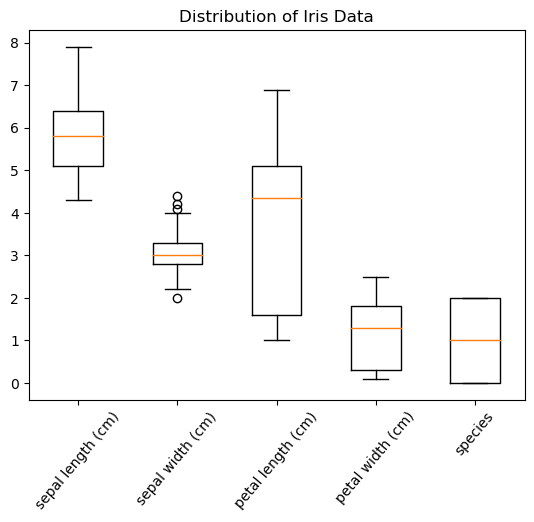

In [3]:
plt.boxplot(df, labels=df.columns)
plt.xticks(rotation=50)
plt.title("Distribution of Iris Data")
plt.show()

In [4]:
species_dict = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['species_name'] = df['species'].map(species_dict)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


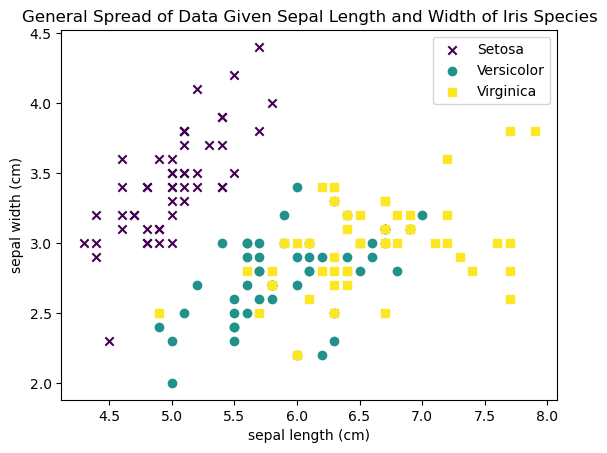

In [5]:
markers = ('x', 'o', 's')
colors = plt.cm.viridis(np.linspace(0, 1, len(df['species'].unique())))
color_map = ListedColormap(colors)

for index, species in enumerate(df['species_name'].unique()):
    species_data = df.where(df['species_name'] == species)
    plt.scatter(x=species_data['sepal length (cm)'], 
                y=species_data['sepal width (cm)'],  
                color = color_map.colors[index], 
                label = species,
                marker=markers[index])

plt.legend()
plt.title("General Spread of Data Given Sepal Length and Width of Iris Species")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

___________________________________________________________
## Training and Comparing a variety of Classifiers
___________________________________________________________

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[iris_data.feature_names[:2]], df['species'], test_size = 0.3)

_______________________________________________________________________

The accuracy of the knn model is: 80.0 %


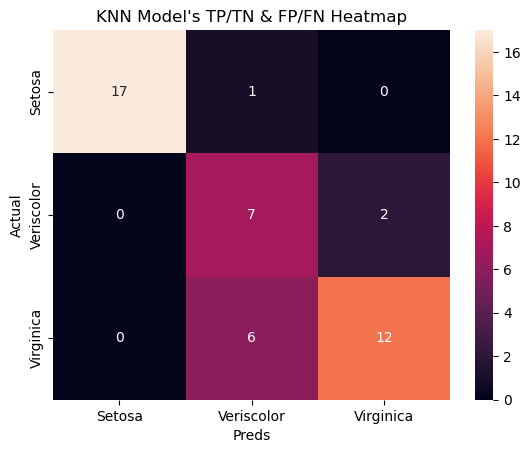

In [7]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 450)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print(f"The accuracy of the knn model is: {round(accuracy_score(y_test, knn_preds), 5) * 100} %")
cm = confusion_matrix(y_test, knn_preds)
sns.heatmap(cm, annot=True, xticklabels=['Setosa','Veriscolor','Virginica'], yticklabels=['Setosa','Veriscolor','Virginica'])
plt.title("KNN Model's TP/TN & FP/FN Heatmap")
plt.xlabel("Preds")
plt.ylabel("Actual")
plt.show()

The accuracy of the linear SVM model is: 75.556 %


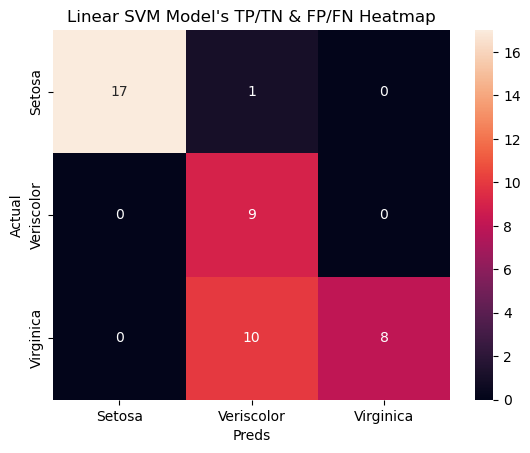

In [8]:
linear_svm = SVC(kernel='linear', gamma = 2, C = .05)
linear_svm.fit(X_train, y_train)
linear_svm_preds = linear_svm.predict(X_test)
print(f"The accuracy of the linear SVM model is: {round(accuracy_score(y_test, linear_svm_preds), 5) * 100} %")
cm = confusion_matrix(y_test, linear_svm_preds)
sns.heatmap(cm, annot=True, xticklabels=['Setosa','Veriscolor','Virginica'], yticklabels=['Setosa','Veriscolor','Virginica'])
plt.title("Linear SVM Model's TP/TN & FP/FN Heatmap")
plt.xlabel("Preds")
plt.ylabel("Actual")
plt.show()

The accuracy of the rbf SVM model is: 80.0 %


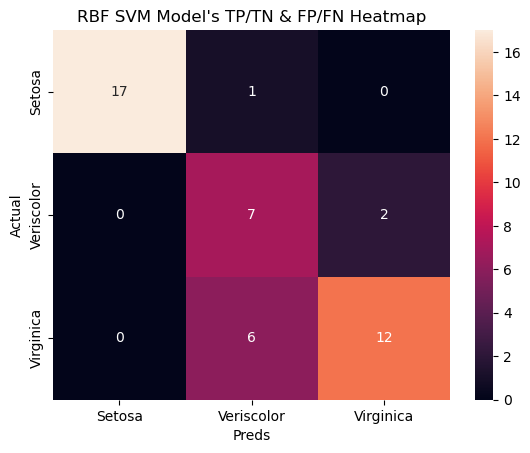

In [9]:
rbf_svm = SVC(kernel='rbf', gamma = .5, C = 1)
rbf_svm.fit(X_train, y_train)
rbf_svm_preds = rbf_svm.predict(X_test)
print(f"The accuracy of the rbf SVM model is: {round(accuracy_score(y_test, rbf_svm_preds), 5) * 100} %")
cm = confusion_matrix(y_test, rbf_svm_preds)
sns.heatmap(cm, annot=True, xticklabels=['Setosa','Veriscolor','Virginica'], yticklabels=['Setosa','Veriscolor','Virginica'])
plt.title("RBF SVM Model's TP/TN & FP/FN Heatmap")
plt.xlabel("Preds")
plt.ylabel("Actual")
plt.show()

The accuracy of the Polynomial SVM model is: 77.778 %


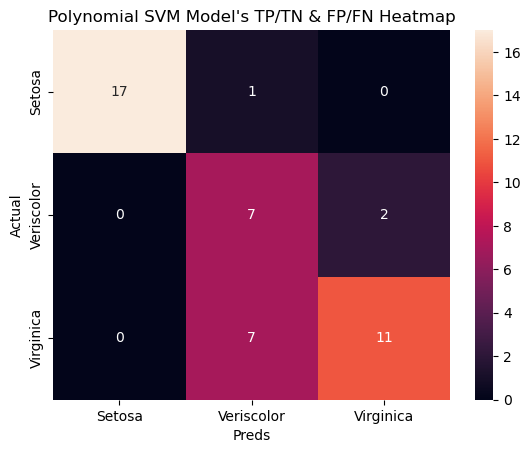

In [10]:
poly_svm = SVC(kernel='poly', gamma = .5, C = 10)
poly_svm.fit(X_train, y_train)
poly_svm_preds = poly_svm.predict(X_test)
print(f"The accuracy of the Polynomial SVM model is: {round(accuracy_score(y_test, poly_svm_preds), 5) * 100} %")
cm = confusion_matrix(y_test, poly_svm_preds)
sns.heatmap(cm, annot=True, xticklabels=['Setosa','Veriscolor','Virginica'], yticklabels=['Setosa','Veriscolor','Virginica'])
plt.title("Polynomial SVM Model's TP/TN & FP/FN Heatmap")
plt.xlabel("Preds")
plt.ylabel("Actual")
plt.show()

_______________________________________________________________________
## Analysis:
- ### The results make sense to me. All models have near perfect prediction capacity for Iris Setosa, but both Veriscolor and Virginica have a lot of data overlap between the two features which were selected for this project. Likely, some more data cleanup before training the models could be helpful, as well as using all of the features. As, maybe there are some details that differ between Veriscolor and Virginica that the model can pick up on and use to differentiate between them. 
_______________________________________________________________________